# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [4]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Users/anninghu/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


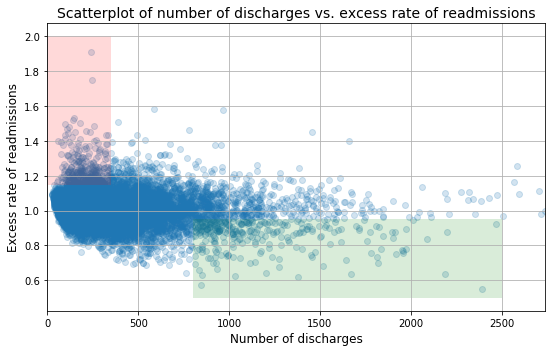

In [5]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

## A

In [6]:
middle_pack = []
for row in clean_hospital_read_df.iterrows():
    if row[1][4] > 100 and row[1][4] < 200:
        middle_pack.append(row[1][6])
middle_pack_mean = np.mean(middle_pack)
middle_pack_count = len(middle_pack)
print('middle_pack_mean: ', middle_pack_mean)
print('middle_pack_count: ', middle_pack_count)

middle_pack_mean:  1.01186811433
middle_pack_count:  2694


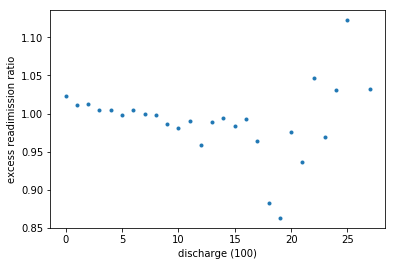

In [7]:
discharge_bins = {}
for i in np.arange(len(x)):
    bin_key = (int) (x[i] / 100)
    if bin_key not in discharge_bins:
        discharge_bins[bin_key] = []
    discharge_bins[bin_key].append(y[i])
avg_ear_per_bin = []
bin_names = discharge_bins.keys()
for bin_name in bin_names:
    avg_ear_per_bin.append(np.mean(discharge_bins[bin_name]))
_ = plt.plot(bin_names, avg_ear_per_bin, marker='.', linestyle='none')
_ = plt.xlabel('discharge (100)')
_ = plt.ylabel('excess readimission ratio')
plt.show()

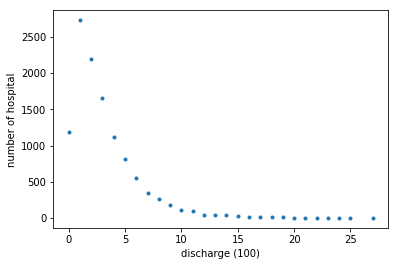

In [8]:
count_per_bin = []
for bin_name in bin_names:
    count_per_bin.append(len(discharge_bins[bin_name]))
_ = plt.plot(bin_names, count_per_bin, marker='.', linestyle='none')
_ = plt.xlabel('discharge (100)')
_ = plt.ylabel('number of hospital')
plt.show()

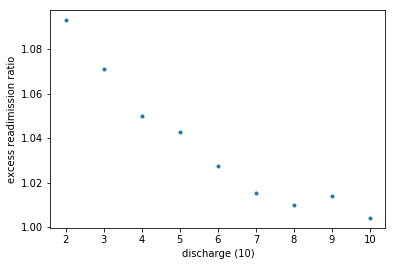

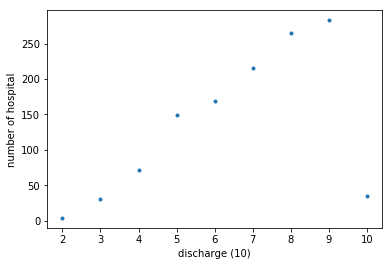

In [9]:
under_100_bins = {}
for i in np.arange(len(x)):
    if x[i] <= 100:
        bin_key = (int) (x[i] / 10)
        if bin_key not in under_100_bins:
            under_100_bins[bin_key] = []
        under_100_bins[bin_key].append(y[i])

under_100_avg_ear_per_bin = []
under_100_bin_names = under_100_bins.keys()
for bin_name in under_100_bin_names:
    under_100_avg_ear_per_bin.append(np.mean(under_100_bins[bin_name]))
_ = plt.plot(under_100_bin_names, under_100_avg_ear_per_bin, marker='.', linestyle='none')
_ = plt.xlabel('discharge (10)')
_ = plt.ylabel('excess readimission ratio')
plt.show()

under_100_count_per_bin = []
for bin_name in under_100_bin_names:
    under_100_count_per_bin.append(len(under_100_bins[bin_name]))
_ = plt.plot(under_100_bin_names, under_100_count_per_bin, marker='.', linestyle='none')
_ = plt.xlabel('discharge (10)')
_ = plt.ylabel('number of hospital')
plt.show()

I don't agree with the analysis, looking at the charts generated above, majority of the hospitals have fewer than 1000 discharges, and majority of that have fewer than 500 discharges, and the excess readmission rate for hospitals over 1500 can vary greatly. These points makes the observation for > 1000 discharges hospitals less realible, individual hospitals can have bigger impact on the overall mean. 

## B

### 1.
Null hypothesis is that the number of discharge does not affect the excess readmission ratio. This can be interpretted as the slope should be close to 0 when discharge number is x and excess readmission ratio is y.

### 2.

In [10]:
slope, intercept = np.polyfit(x, y, 1)
print('slope: ', slope)
print('y intercept: ', intercept)

slope:  -2.85650529438e-05
y intercept:  1.01794755795


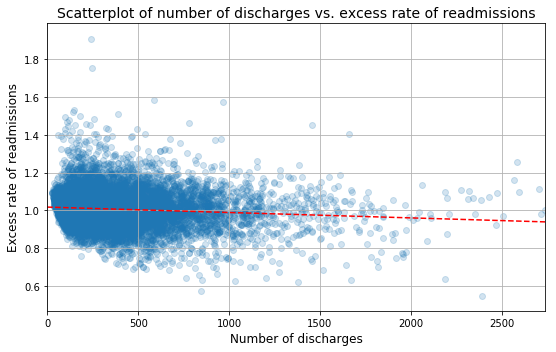

In [11]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--', color='red')

# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

abline(slope, intercept)

ax.grid(True)
fig.tight_layout()

slope of the dataset is slightly negative, but to guarantee that this is not a fluke we will generate bootstrap samples to test for slope. 

In [12]:
def slope_for_index_sample(index_sample):
    sampled_x = np.take(x, index_sample)
    sampled_y = np.take(y, index_sample)
    sampled_slope, sampled_intercept = np.polyfit(sampled_x, sampled_y, 1)
    return sampled_slope

def draw_bs_replicate(length):
    index = np.arange(length)
    index_sample = np.random.choice(index, len(index))
    return slope_for_index_sample(index_sample)

def draw_bs_rep(length, size=1):
    bs_replicates = np.empty(size)
    for i in range(size):
        bs_replicates[i] = draw_bs_replicate(length)
    return bs_replicates

In [13]:
sample = draw_bs_rep(len(x), 10000)

In [14]:
p_value = np.sum(sample <= slope) / len(sample)
sample_mean = np.mean(sample)
print('p_value: ', p_value)
print('mean: ', sample_mean)

p_value:  0.4932
mean:  -2.85646872118e-05


There is strong statistical evidence that the slope is negative, so that the more discharge, the less the excess readmission ratio. 

### 3.

In [17]:
margin_of_error = 1.96 * np.std(sample) / np.sqrt(len(sample))
print('margin_of_error: ', margin_of_error)
interval = [sample_mean - margin_of_error, sample_mean + margin_of_error]
print('interval: ', interval)

margin_of_error:  6.95411558102e-08
interval:  [-2.8634228367656332e-05, -2.8495146056035882e-05]


### 4.
Statistically there does appear to be a negative correlation between number of discharge and excess readmission rate, but looking back at the plots provided in part A and in 5. of part B , I would arguing practically, that hospitals that have very high (>= 2200) discharges have significantly higher excess readmission ratio. I would recommend that those hospitals are actually the ones that needs help.

### 5.
The advantage of using scatter plot is that is it easy to tell where majority of the hospital are at in terms of discharge number to excess readmission ratio, but it is hard to tell given a range of discharge number, what the exact excess readmission ratio average is.

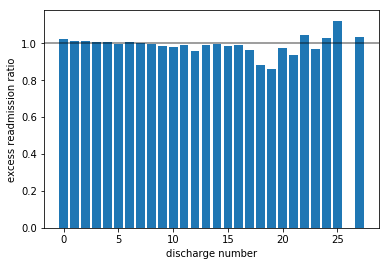

In [71]:
_ = plt.bar(bin_names, avg_ear_per_bin, 0.8)
_ = plt.xlabel('discharge number')
_ = plt.ylabel('excess readmission ratio')
_ = plt.axhline(y=1, color='black', alpha=0.5, linestyle='-')
plt.show()